<a href="https://colab.research.google.com/github/tylerjmwhit/Maching_learning_pratice_notebooks/blob/main/Week2_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Iris dataset (from sklearn.datasets import load_iris):

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()

Display the count of the target classifications in a table or a distribution/bar graph

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

Run describe on the input columns to see the range of values for each input (also for each class if you want a challenge)

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Plot the data of any two input columns, e.g. X axis sepal length, Y axis sepal width, and plot the dots corresponding to the classification, eg. setosa=red, virginica=blue, versicolor=green



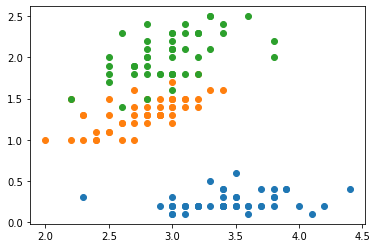

In [ ]:
groups = df.groupby('target')
for name, group in groups:
  plt.plot(group['sepal width (cm)'], group['petal width (cm)'], marker='o', linestyle='')

The MNIST dataset (from tensorflow.keras.datasets.mnist import load_data):



In [ ]:
from tensorflow.keras.datasets.mnist import load_data
(train_x, train_y), (test_x, test_y) = load_data()

11501568/11490434 [==============================] - 0s 0us/step


Display the count of the target classifications in a pandas series/table or a distribution/bar graph

In [ ]:
index, counts = np.unique(train_y, return_counts=True)
pd.Series(counts)
print(train_y)

[5 0 4 ... 5 6 8]


(60000,)

plot examples of each of the 10 digits (using plt.imshow)


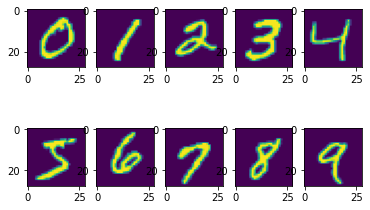

In [ ]:
for i in range(10):
    index = train_y.tolist().index(i)
    im = train_x[index]
    ax = plt.subplot(2,5, i+1)
    ax.imshow(im)

The Titanic dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
os.listdir('/content/drive/My Drive/EE485_dataSets')

['titanic_train.csv', 'titanic_test.csv']

In [ ]:
titanic = pd.read_csv('/content/drive/My Drive/EE485_dataSets/titanic_train.csv')

Display the count of the target classifications in a table or a distribution/bar graph

In [ ]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Display the count of missing values for each input column



In [ ]:
cols = []
sums = []
for col in titanic.columns:
  sums.append(titanic[col].isna().sum())
  cols.append(col)
pd.Series(sums, index = cols)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

separate the numerical input columns from the categorical input columns



In [ ]:
numeric_columns = titanic.select_dtypes(include='number')
categoric_columns = titanic.select_dtypes(include='object')
print(numeric_columns)
print(categoric_columns)

     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0              1         0       3  22.0      1      0   7.2500
1              2         1       1  38.0      1      0  71.2833
2              3         1       3  26.0      0      0   7.9250
3              4         1       1  35.0      1      0  53.1000
4              5         0       3  35.0      0      0   8.0500
..           ...       ...     ...   ...    ...    ...      ...
886          887         0       2  27.0      0      0  13.0000
887          888         1       1  19.0      0      0  30.0000
888          889         0       3   NaN      1      2  23.4500
889          890         1       1  26.0      0      0  30.0000
890          891         0       3  32.0      0      0   7.7500

[891 rows x 7 columns]
                                                  Name     Sex  ... Cabin Embarked
0                              Braund, Mr. Owen Harris    male  ...   NaN        S
1    Cumings, Mrs. John Bradley (Florence 

Create a new column that retrieves the cabin letter



In [ ]:
titanic['CabinNo'] = titanic['Cabin'].apply(lambda s:s[0] if type(s)!=float else s)
titanic['CabinNo'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: CabinNo, dtype: int64

Create a new column that retrieves the passenger's title from the passenger's name, e.g. Mr, Mrs, Count, etc

In [ ]:
def get_title(input):
    title = input.split(',')[1]
    return title.split()[0]
titanic['title'] = titanic['Name'].apply(get_title)